Mounting the files on google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup as bs

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

Train data

Removing the unnecessary features and keeping the relevant features.

Converting Y label strings to numerical value

In [ ]:
d = pd.read_csv('/content/drive/MyDrive/EE769Project/glove_sent_encoding_data_12Sent.csv')
d.drop(["Unnamed: 0","Code_blocks","Num_Tags","Body_size","Extra_tags","Code_Lines","Num Tags"], axis=1,inplace=True)
# To convert string to numeric value
new_values = {'HQ':2, 'LQ_EDIT':1, 'LQ_CLOSE':0}
d['Y']  = d.Y.replace(new_values)

Display the data


In [4]:
d.head(10)

,Y,Body_1,Body_2,Body_3,Body_4,Body_5,Body_6,Body_7,Body_8,Body_9,Body_10,Body_11,Body_12,Body_13,Body_14,Body_15,Body_16,Body_17,Body_18,Body_19,Body_20,Body_21,Body_22,Body_23,Body_24,Body_25,Body_26,Body_27,Body_28,Body_29,Body_30,Body_31,Body_32,Body_33,Body_34,Body_35,Body_36,Body_37,Body_38,Body_39,...,Title_261,Title_262,Title_263,Title_264,Title_265,Title_266,Title_267,Title_268,Title_269,Title_270,Title_271,Title_272,Title_273,Title_274,Title_275,Title_276,Title_277,Title_278,Title_279,Title_280,Title_281,Title_282,Title_283,Title_284,Title_285,Title_286,Title_287,Title_288,Title_289,Title_290,Title_291,Title_292,Title_293,Title_294,Title_295,Title_296,Title_297,Title_298,Title_299,Title_300
0,0,-0.240987,0.294838,0.043283,-0.216777,-0.273428,-0.262819,-0.128607,-0.047490,0.206232,-1.043640,0.093642,-0.065293,-0.091981,0.128572,0.199107,-0.104559,-0.101942,0.023553,-0.073419,-0.003258,-0.066790,-0.244832,0.030390,0.191575,0.024952,0.215342,-0.074820,0.043747,0.193661,-0.079593,-0.149580,0.061730,-0.005052,-0.147827,-0.700040,0.165868,-0.046675,-0.265952,-0.267837,...,-0.007578,-0.091531,-0.291598,-0.068264,0.008742,0.005379,-0.058632,-0.246112,0.218130,-0.016450,0.004930,-0.048359,0.124874,0.333840,-0.197837,0.525809,-1.544100,-0.024925,0.062168,0.020237,-0.218701,0.089318,0.091753,-0.120384,-0.108414,-0.028071,-0.230014,-0.023561,-0.042278,-0.110954,-0.168018,0.012100,-0.075568,-0.118220,0.475009,0.345620,-0.062680,-0.013058,-0.346789,-0.184302
1,2,-0.293154,-0.076427,-0.154668,-0.059217,-0.059002,0.278274,-0.014315,0.197191,0.049958,-0.786268,0.266176,0.110769,-0.089363,0.001999,0.111346,0.092343,0.248268,-0.146874,0.039370,-0.013702,0.291454,0.045309,0.145594,0.156029,-0.190869,0.172915,-0.059751,-0.151784,-0.003540,-0.142450,0.088757,0.444503,-0.180326,-0.069164,-0.171736,0.190470,-0.034064,0.038189,0.106640,...,0.117089,-0.152083,-0.164410,-0.106623,-0.178220,0.225706,-0.042528,-0.363157,0.286871,-0.009287,0.068377,0.148473,-0.162717,0.293580,-0.335430,0.194250,-0.129697,0.015882,-0.400536,0.132880,-0.135337,-0.175592,-0.097263,-0.037669,-0.121970,-0.435520,-0.149193,-0.058346,0.081077,-0.402637,-0.092627,-0.062974,0.263365,-0.012204,0.098552,-0.193720,0.380953,-0.360287,0.137164,0.173387
2,2,-0.120708,0.012485,-0.084866,-0.157200,-0.081759,-0.095468,-0.085420,0.155715,0.074075,-0.941932,0.112102,0.024208,0.017980,-0.105131,-0.318010,-0.039927,0.039036,-0.101775,-0.069636,-0.233389,-0.228755,0.103719,0.152153,0.020319,-0.179047,-0.229925,0.011305,0.058682,-0.010918,0.309250,0.156871,-0.047273,0.064185,0.096737,-0.324866,0.256432,-0.119297,-0.374670,-0.026976,...,-0.046861,0.050190,0.062310,0.242104,0.187998,-0.163162,-0.149218,0.090508,0.053851,-0.090001,-0.120537,0.151753,-0.016855,0.134122,-0.248188,0.112005,-0.586151,0.139937,0.233480,0.018990,-0.239051,0.084330,-0.370279,0.097975,0.125676,-0.073724,-0.075676,0.143606,0.113822,0.251213,0.364641,-0.155353,-0.191636,0.023351,0.006381,-0.106198,0.038931,-0.005640,0.000261,-0.132440
3,2,-0.402403,-0.168747,0.150591,-0.276718,0.146649,0.007415,0.016708,-0.432730,-0.137463,-1.579967,0.107133,0.106472,-0.225510,0.363420,0.288383,-0.005712,-0.178427,0.025010,0.140244,0.049824,-0.159559,0.435483,0.082506,0.127247,-0.498813,-0.035577,0.163044,-0.321000,0.053461,-0.260323,0.011077,0.117706,-0.276837,-0.305683,-0.767600,0.174055,-0.040510,-0.146608,-0.086315,...,0.114783,-0.220975,-0.248665,-0.015262,0.086361,0.291582,0.156888,0.208077,0.511552,0.300493,0.168303,-0.403020,-0.118676,-0.073964,0.154756,-0.211824,-0.092012,-0.117538,-0.103871,-0.081810,-0.081461,-0.124442,0.042128,-0.098186,-0.005035,-0.214217,0.212308,-0.169194,0.036502,-0.083160,0.106163,0.324990,-0.018780,-0.346085,0.417951,-0.005268,-0.022219,-0.315493,0.067823,-0.010444
4,2,-0.325340,0.217111,0.267070,-0.306210,-0.158905,-0.164993,0.157609,0.371457,0.197530,-1.630070,0.147243,-0.121327,0.252770,-0.139895,0.139031,0.068265,0.250888,-0.057495,0.096359,-0.246751,0.295695,-0.498655,0.178315,0.360510,-0.0410

Normalising the data using standard scalar

In [6]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler() #for data normalization
cols= list(d.columns.values)

scaler.fit(d[cols])
X = pd.DataFrame(scaler.transform(d[cols]))
y = pd.DataFrame(d['Y'])

Importing the test data



In [7]:
td = pd.read_csv('/content/drive/MyDrive/EE769Project/glove_sent_encoding_Testdata_12Sent.csv')
td.drop(["Unnamed: 0","Id","CreationDate","Code_blocks","Num_Tags","Body_size","Extra_tags","Code_Lines","Num Tags"],axis=1,inplace=True)
# To convert string to numeric value
new_values = {'HQ':2, 'LQ_EDIT':1, 'LQ_CLOSE':0}
td['Y']  = td.Y.replace(new_values)

#Normalize test data using the same scaler

cols= list(td.columns.values)
validX = pd.DataFrame(scaler.transform(td[cols]))
validY = pd.DataFrame(td['Y'])

In [ ]:
display(td)

,Y,Body_1,Body_2,Body_3,Body_4,Body_5,Body_6,Body_7,Body_8,Body_9,Body_10,Body_11,Body_12,Body_13,Body_14,Body_15,Body_16,Body_17,Body_18,Body_19,Body_20,Body_21,Body_22,Body_23,Body_24,Body_25,Body_26,Body_27,Body_28,Body_29,Body_30,Body_31,Body_32,Body_33,Body_34,Body_35,Body_36,Body_37,Body_38,Body_39,...,Title_261,Title_262,Title_263,Title_264,Title_265,Title_266,Title_267,Title_268,Title_269,Title_270,Title_271,Title_272,Title_273,Title_274,Title_275,Title_276,Title_277,Title_278,Title_279,Title_280,Title_281,Title_282,Title_283,Title_284,Title_285,Title_286,Title_287,Title_288,Title_289,Title_290,Title_291,Title_292,Title_293,Title_294,Title_295,Title_296,Title_297,Title_298,Title_299,Title_300
0,1,-0.340877,0.215006,0.042059,0.044235,-0.095466,0.196629,-0.003774,0.159970,0.004629,-0.897817,0.053149,0.057117,-0.041261,0.015571,-0.038483,-0.217230,-0.127944,-0.165420,-0.000777,-0.174952,-0.037054,0.064127,-0.158586,0.124899,-0.043402,0.067632,-0.093716,0.159732,0.130028,-0.123124,0.049366,0.033423,-0.118762,-0.044195,-0.813885,0.117765,0.090156,0.028049,-0.406280,...,-0.139323,-0.048838,-0.026537,0.077406,0.069879,0.187693,0.107893,0.027879,0.141835,0.081695,-0.226857,-0.043289,0.209849,-0.188163,-0.038189,-0.027231,-1.455375,0.072748,0.083586,0.053776,-0.188114,-0.073266,-0.190253,0.042722,-0.173995,0.109777,0.147412,0.099228,-0.023537,-0.395013,0.206241,0.054576,-0.170344,-0.074469,0.060374,0.150742,0.023050,-0.090500,0.019662,0.019357
1,1,-0.317487,0.283310,0.161350,0.007686,-0.391707,0.207225,-0.238494,0.076843,0.138330,-0.962733,0.369443,0.175665,-0.034254,0.416783,0.006655,0.298977,-0.362460,0.199014,-0.211890,-0.342117,-0.325649,-0.158180,-0.034711,-0.027403,0.048063,0.064993,-0.050820,0.057365,-0.116117,-0.323510,-0.391542,0.339480,-0.033733,0.352940,-1.249733,0.242970,0.389523,0.356480,-0.530697,...,-0.112984,-0.024103,0.116888,0.257347,0.183601,0.403038,-0.231670,0.032001,-0.001861,-0.088077,-0.438003,0.112986,0.229143,0.413923,0.075720,-0.407310,-1.610467,0.396207,0.296177,-0.293330,-0.456730,0.223468,-0.123125,-0.373383,0.161447,-0.399090,0.175964,0.041453,-0.055593,-0.000695,-0.011951,-0.147693,0.002370,0.014210,0.190050,-0.160333,0.453571,-0.289137,-0.033799,-0.084037
2,2,-0.219626,0.050607,0.043197,-0.111386,-0.050845,0.038048,-0.194342,-0.056696,0.137598,-0.737625,0.224304,-0.008981,0.071190,-0.143245,-0.213485,0.163526,-0.115521,0.091554,-0.079014,0.074989,0.029614,-0.123970,0.058389,0.169670,-0.114695,0.017152,-0.100463,0.179791,-0.149299,0.198931,-0.149124,-0.033526,-0.053938,0.002107,0.019931,-0.020367,0.084659,0.121586,-0.090234,...,-0.103640,-0.541410,-0.318410,-0.098462,0.130510,0.222980,-0.016344,0.168200,0.567350,-0.481430,-0.159240,-0.555060,-0.213160,-0.803490,0.044645,-0.709430,-0.294970,-0.511900,-0.366220,-0.351110,-0.161930,0.369920,-0.189060,0.368290,-0.972190,-0.129030,0.166290,0.653680,0.539990,-0.471150,0.178900,0.209660,0.465820,-0.781370,-0.569280,-0.374350,-0.123720,0.051204,0.791200,-0.713580
3,1,-0.274443,0.032652,-0.069473,-0.181262,-0.059048,0.089089,0.064029,-0.012579,0.089457,-1.323730,0.046081,-0.069050,-0.187425,-0.073403,0.112012,-0.054203,-0.208339,-0.065831,0.205049,-0.108460,-0.046697,0.144407,0.160408,0.229873,-0.045338,0.062148,0.167209,0.295752,-0.001458,-0.054021,-0.122230,0.246369,-0.141188,0.031583,-0.630895,0.178795,-0.001612,-0.006151,0.069256,...,0.186280,0.035717,-0.150680,-0.203480,-0.338687,0.097367,0.166783,0.107827,0.192506,0.327670,-0.263653,-0.291083,-0.115321,-0.080212,-0.413057,-0.172063,-0.353060,-0.256941,-0.001917,0.197095,-0.098512,-0.183403,-0.629495,-0.212549,0.016530,-0.098406,-0.073957,-0.026804,-0.445486,-0.000705,-0.147647,-0.134659,0.041587,-0.086757,0.368247,-0.360973,0.034436,0.190240,0.212298,0.092343
4,1,-0.174143,0.054057,0.184725,0.001981,-0.079135,0.152766,0.135071,0.051624,0.027387,-0.855791,0.214892,0.225412,-0.133692,0.089966,0.106583,-0.387222,-0.086797,0.137901,0.026171,0.051993,-0.123805,0.036047,-0.025291,-0.037893,0.058400,0.1168

Principal component analysis  for dimensionality reduction to reduce the number of features 

In [8]:
pca5 = PCA(n_components=800)
pca5.fit(X)
X_trans2000_train = pca5.transform(X)
X_trans2000_test = pca5.transform(validX)
exp_vars = pca5.explained_variance_ratio_
#plt.plot(range(1,X.shape[1]+1),exp_vars,'--o')

Plot the graph

Text(0.5, 1.0, 'explained variance v/s features')

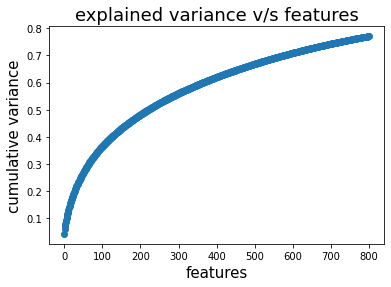

In [9]:
cum_sum = np.cumsum(exp_vars)
#plt.figure(figsize(10,10))
plt.plot(range(len(exp_vars)),cum_sum,'-o')
plt.xlabel('features', fontsize=15)
plt.ylabel('cumulative variance', fontsize=15)
plt.title('explained variance v/s features', fontsize=18)

In [ ]:
train_PCA = pd.DataFrame(data=X_trans2000_train)
train_PCA.to_csv('/content/drive/MyDrive/EE769Project/TrainingPCA2000.csv')
train_PCA = pd.DataFrame(data=X_trans2000_test)
train_PCA.to_csv('/content/drive/MyDrive/EE769Project/TestingPCA2000.csv')

In [ ]:
exp_var = pd.DataFrame(data=pca5.explained_variance_ratio_)
exp_var.to_csv('/content/drive/MyDrive/EE769Project/TestingPCA2000.csv')

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score # ROC and F1 are balanced metrics

Training **Random Forest Classifier** and tuning it for different hyperparameters

In [ ]:
rfc = RandomForestClassifier()

scoring = 'f1_weighted'

print('Training RFC using GridSearchCV')

hyperparameters = {'max_depth': [10,20,25], 'n_estimators':[50,100,150,200]}

clf = GridSearchCV(rfc, cv=5, param_grid=hyperparameters,  scoring=scoring, verbose=2.1)
clf.fit(np.array(X_trans2000_train), np.squeeze(y))
print('Best parameters:')
print(clf.best_params_)
print('Best' + scoring + ":" + str(clf.best_score_))

print('Train classification report:')
y_true, y_pred = np.squeeze(y), clf.predict(np.array(X_trans2000_train))
print(classification_report(y_true, y_pred))

print('Test classification report:')
y_true, y_pred = np.squeeze(validY), clf.predict(np.array(X_trans2000_test))
print(classification_report(y_true, y_pred))

Training RFC using GridSearchCV
Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=10, n_estimators=50 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....... max_depth=10, n_estimators=50, score=0.591, total= 1.3min
[CV] max_depth=10, n_estimators=50 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s


[CV] ....... max_depth=10, n_estimators=50, score=0.596, total= 1.3min
[CV] max_depth=10, n_estimators=50 ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.6min remaining:    0.0s


[CV] ....... max_depth=10, n_estimators=50, score=0.590, total= 1.3min
[CV] max_depth=10, n_estimators=50 ...................................
[CV] ....... max_depth=10, n_estimators=50, score=0.589, total= 1.3min
[CV] max_depth=10, n_estimators=50 ...................................
[CV] ....... max_depth=10, n_estimators=50, score=0.587, total= 1.3min
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.603, total= 2.6min
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.612, total= 2.6min
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.597, total= 2.6min
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.610, total= 2.6min
[CV] max_depth=10, n_estimators=100 ..................................
[CV] .

KeyboardInterrupt: ignored

The best hyperparameters after tuning comes out to be $max\ depth\ as\ 20$ and $n\ estimators\ as\ 200$

In [ ]:
rfc = RandomForestClassifier()

scoring = 'f1_weighted'

print('Training RFC using GridSearchCV')

hyperparameters = {'max_depth': [5], 'n_estimators':[200]}

clf = GridSearchCV(rfc, cv=5, param_grid=hyperparameters,  scoring=scoring, verbose=2.1)
clf.fit(np.array(X_trans2000_train), np.squeeze(y))
print('Best parameters:')
print(clf.best_params_)
print('Best' + scoring + ":" + str(clf.best_score_))

print('Train classification report:')
y_true, y_pred = np.squeeze(y), clf.predict(np.array(X_trans2000_train))
print(classification_report(y_true, y_pred))

print('Test classification report:')
y_true, y_pred = np.squeeze(validY), clf.predict(np.array(X_trans2000_test))
print(classification_report(y_true, y_pred))

Training RFC using GridSearchCV
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=5, n_estimators=200 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....... max_depth=5, n_estimators=200, score=0.579, total= 3.2min
[CV] max_depth=5, n_estimators=200 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.2min remaining:    0.0s


[CV] ....... max_depth=5, n_estimators=200, score=0.588, total= 3.2min
[CV] max_depth=5, n_estimators=200 ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  6.4min remaining:    0.0s


[CV] ....... max_depth=5, n_estimators=200, score=0.569, total= 3.1min
[CV] max_depth=5, n_estimators=200 ...................................
[CV] ....... max_depth=5, n_estimators=200, score=0.577, total= 3.1min
[CV] max_depth=5, n_estimators=200 ...................................
[CV] ....... max_depth=5, n_estimators=200, score=0.575, total= 3.1min


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 15.7min finished


Best parameters:
{'max_depth': 5, 'n_estimators': 200}
Bestf1_weighted:0.57750419448965
Train classification report:
              precision    recall  f1-score   support

           0       0.65      0.57      0.61     15000
           1       0.66      0.46      0.54     15000
           2       0.58      0.82      0.68     15000

    accuracy                           0.62     45000
   macro avg       0.63      0.62      0.61     45000
weighted avg       0.63      0.62      0.61     45000

Test classification report:
              precision    recall  f1-score   support

           0       0.62      0.55      0.58      5000
           1       0.63      0.41      0.50      5000
           2       0.56      0.81      0.66      5000

    accuracy                           0.59     15000
   macro avg       0.60      0.59      0.58     15000
weighted avg       0.60      0.59      0.58     15000



Training the **XG Boost Classfier** on the data

In [11]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

Mean square errors before and after splitting

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split as ttsplit
from sklearn.metrics import mean_squared_error as mse


# split data into training and testing sets
# then split training set in half
#X_train, X_test, y_train, y_test = ttsplit(X, y, test_size=0.1, random_state=0)
X_train_1, X_train_2, y_train_1, y_train_2 = ttsplit(X_trans2000_train,y,test_size=0.5,random_state=1)

xg_train_1 = xgb.DMatrix(X_train_1, label=y_train_1)
xg_train_2 = xgb.DMatrix(X_train_2, label=y_train_2)
xg_test = xgb.DMatrix(X_trans2000_test, label=validY)

params = {'objective': 'reg:squarederror', 'verbose': False}
model_1 = xgb.train(params, xg_train_1, 30)
model_1.save_model('model_1.model')

# ================= train two versions of the model =====================#
model_2_v1 = xgb.train(params, xg_train_2, 30)
model_2_v2 = xgb.train(params, xg_train_2, 30, xgb_model='model_1.model')

print(mse(model_1.predict(xg_test), validY))     # benchmark
print(mse(model_2_v1.predict(xg_test), validY))  # "before"
print(mse(model_2_v2.predict(xg_test), validY))  # "after"

0.5122351461524909
0.5058494469864965
0.5053648113670353


In [ ]:
print(model_1.predict(xg_test))

[1.1222706  0.9030149  1.2960899  ... 1.5764829  0.35355026 1.7275496 ]


In [ ]:
from sklearn.metrics import accuracy_score
model = XGBClassifier(learning_rate = 0.05, n_estimators=700, max_depth=4)
model.fit(X_trans2000_train, np.squeeze(y))

# make predictions for test set
#y_pred = model.predict(np.array(X_trans2000_test))
#predictions = [round(value) for value in y_pred]

print('Train classification report:')
y_true, y_pred = np.squeeze(y), model.predict(np.array(X_trans2000_train))
predictions = [round(value) for value in y_pred]
print(classification_report(y_true, y_pred))

print('Test classification report:')
y_true1, y_pred1 = np.squeeze(validY), model.predict(np.array(X_trans2000_test))
predictions1 = [round(value) for value in y_pred1]
print(classification_report(y_true1, y_pred1))


Train classification report:
              precision    recall  f1-score   support

           0       0.81      0.82      0.82     15000
           1       0.84      0.77      0.81     15000
           2       0.84      0.90      0.87     15000

    accuracy                           0.83     45000
   macro avg       0.83      0.83      0.83     45000
weighted avg       0.83      0.83      0.83     45000

Test classification report:
              precision    recall  f1-score   support

           0       0.64      0.63      0.63      5000
           1       0.68      0.61      0.64      5000
           2       0.70      0.79      0.74      5000

    accuracy                           0.68     15000
   macro avg       0.67      0.68      0.67     15000
weighted avg       0.67      0.68      0.67     15000



In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(np.squeeze(validY), predictions1)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 67.52%


Training **Neural network** by using ReLU and sigmoid activation functions

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import numpy as np
# create model
model = Sequential()
model.add(Dense(12, input_dim=800, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(np.array(X_trans2000_train), np.squeeze(y), validation_data=(X_trans2000_test,validY), epochs=10, batch_size=50)

Epoch 1/10
900/900 [==============================] - 3s 2ms/step - loss: 0.6585 - accuracy: 0.3482 - val_loss: 0.5514 - val_accuracy: 0.4318
Epoch 2/10
900/900 [==============================] - 2s 2ms/step - loss: 0.5346 - accuracy: 0.4443 - val_loss: 0.5361 - val_accuracy: 0.4539
Epoch 3/10
900/900 [==============================] - 2s 2ms/step - loss: 0.5053 - accuracy: 0.4758 - val_loss: 0.5263 - val_accuracy: 0.4551
Epoch 4/10
900/900 [==============================] - 2s 2ms/step - loss: 0.4905 - accuracy: 0.4908 - val_loss: 0.5204 - val_accuracy: 0.4681
Epoch 5/10
900/900 [==============================] - 2s 2ms/step - loss: 0.4805 - accuracy: 0.4996 - val_loss: 0.5203 - val_accuracy: 0.4787
Epoch 6/10
900/900 [==============================] - 2s 2ms/step - loss: 0.4705 - accuracy: 0.5134 - val_loss: 0.5129 - val_accuracy: 0.4834
Epoch 7/10
900/900 [==============================] - 2s 2ms/step - loss: 0.4591 - accuracy: 0.5270 - val_loss: 0.5078 - val_accuracy: 0.4892
Epoch 

<Figure size 1440x720 with 0 Axes>

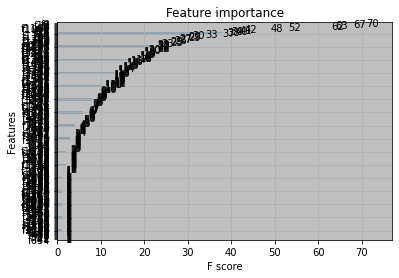

In [ ]:
from xgboost import XGBClassifier, plot_importance
plt.figure(figsize=(50,50))
fit = XGBClassifier().fit(np.array(X_trans2000_train),np.squeeze(y))
plot_importance(fit)